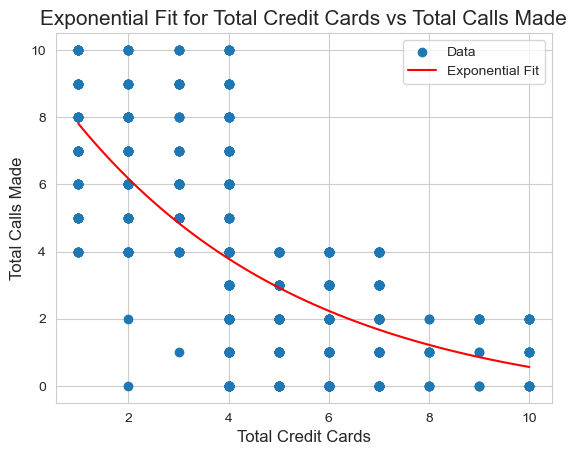

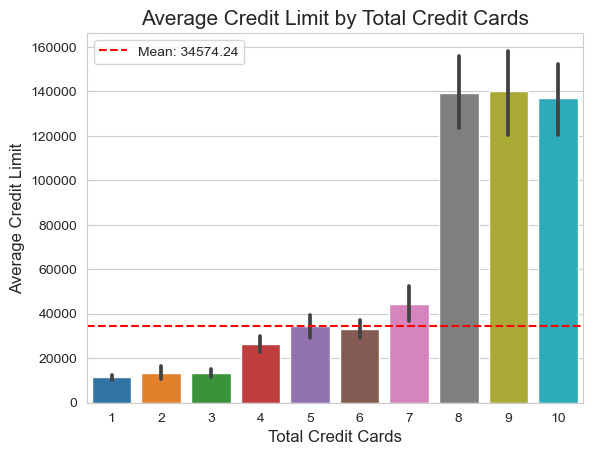

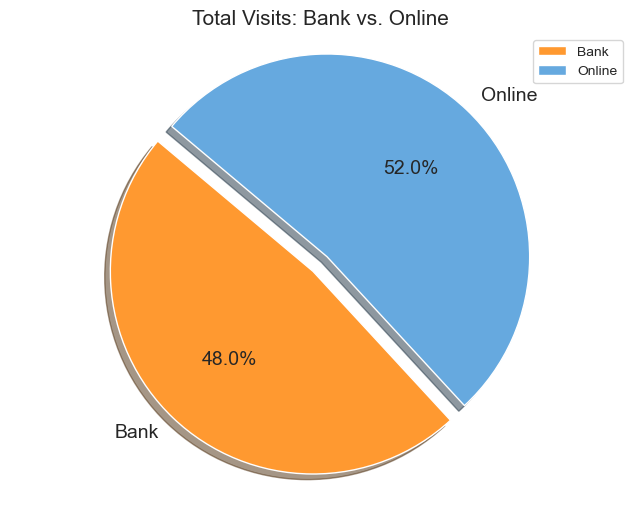

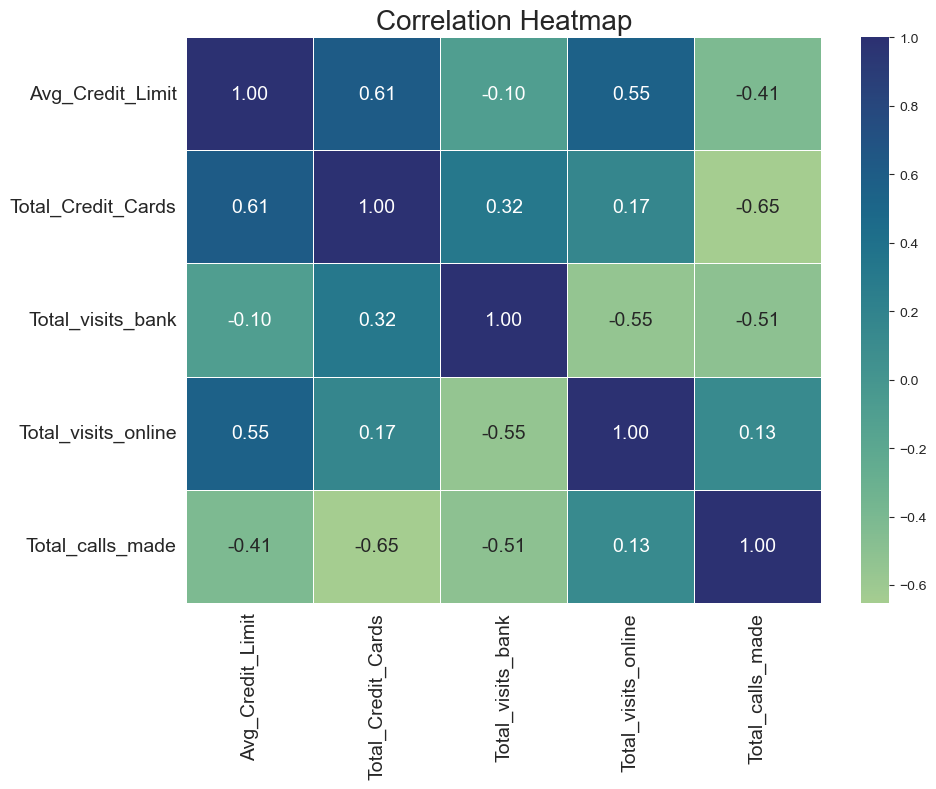

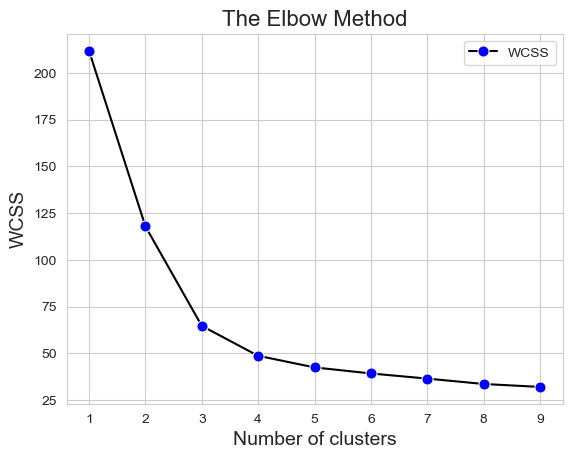

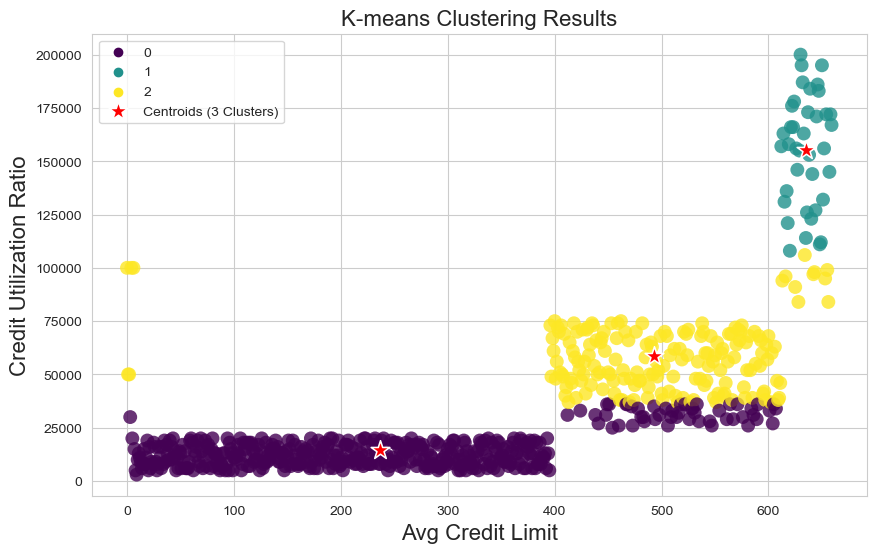

Silhouette score is: 0.716466085833252
Skewness: [2.19738702 0.14454951 0.14157332 2.22054532 0.65740684]
Kurtosis: [ 5.08595484 -0.3760521  -1.1050033   5.68710495 -0.52342367]
       Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
count        660.000000          660.000000         660.000000   
mean       34574.242424            4.706061           2.403030   
std        37625.487804            2.167835           1.631813   
min         3000.000000            1.000000           0.000000   
25%        10000.000000            3.000000           1.000000   
50%        18000.000000            5.000000           2.000000   
75%        48000.000000            6.000000           4.000000   
max       200000.000000           10.000000           5.000000   

       Total_visits_online  Total_calls_made  
count           660.000000        660.000000  
mean              2.606061          3.583333  
std               2.935724          2.865317  
min               0.000000          0.0

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import skew, kurtosis

df = pd.read_csv('Credit Card Customer Data.csv')



def scatter(df):
  
    """
    Scatter plot with exponential fit for Total Credit Cards vs Total Calls Made.

    """
    # Extracting the data
    x_data = df['Total_Credit_Cards']
    y_data = df['Total_calls_made']

    # Define the exponential function
    def exponential_func(x, a, b, c):
        return a * np.exp(-b * x) + c

    # Fit the data to the exponential function
    popt, pcov = curve_fit(exponential_func, x_data, y_data)

    # Plot the scatter plot
    plt.scatter(x_data, y_data, label='Data')

    # Generate points for the best fit line
    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit = exponential_func(x_fit, *popt)

    # Plot the best fit line
    plt.plot(x_fit, y_fit, 'r-', label='Exponential Fit')

    plt.xlabel('Total Credit Cards', fontsize=12)
    plt.ylabel('Total Calls Made', fontsize=12)
    plt.legend()
    plt.title('Exponential Fit for Total Credit Cards vs Total Calls Made', fontsize=15)
    plt.grid(True)
    plt.show()
    

    
def bar_chart(df):
    
    """
    Bar chart showing Average Credit Limit by Total Credit Cards.

    """
    sns.barplot(data=df, x='Total_Credit_Cards', y='Avg_Credit_Limit')
    mean_cl = df['Avg_Credit_Limit'].mean()

    # Overlaying the mean line
    plt.axhline(y=mean_cl, color='red', linestyle='--', label=f'Mean: {mean_cl:.2f}')
    plt.legend()

    # Improving visualization
    sns.set_style("whitegrid")  # Adding grid for better readability
    plt.title('Average Credit Limit by Total Credit Cards', fontsize=15)
    plt.xlabel('Total Credit Cards', fontsize=12)
    plt.ylabel('Average Credit Limit', fontsize=12)

    plt.show()
    

    
def pie_chart(df):
    
    """
    Pie chart showing Total Visits to bank vs online.
    
    """
    # Calculate total visits to bank and online
    total_visits_bank = df['Total_visits_bank'].sum()
    total_visits_online = df['Total_visits_online'].sum()

    # Create a pie chart
    labels = ['Bank', 'Online']
    sizes = [total_visits_bank, total_visits_online]
    colors = ['#ff9930', '#66a9df']  # Custom colors
    explode = (0.1, 0)  # explode the 1st slice (Bank)

    plt.figure(figsize=(8, 6))

    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 14})
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Total Visits: Bank vs. Online', fontsize=15)

    # Add a legend
    plt.legend(loc='upper right', labels=['Bank', 'Online'])

    # Show the plot
    plt.show()
    
    
df1 = df.drop(['Sl_No', 'Customer Key'], axis=1)
df1.describe()



def heat_map(df1):
    
    """
    Heatmap showing correlation between features.

    """
    corr = df1.corr()

    # Set up the matplotlib figure
    plt.figure(figsize=(10, 8))
    # Create heatmap with custom colors
    sns.heatmap(corr, annot=True, cmap='crest', fmt=".2f", linewidths=.5 ,annot_kws={"size": 14})

    # Add title and adjust plot
    plt.title('Correlation Heatmap', fontsize=20)
    plt.yticks(rotation=0,fontsize=14)
    plt.xticks(rotation=90,fontsize=14)
    plt.tight_layout()

    # Show plot
    plt.show()
    

def elbow(X):
    
    """
    Elbow method to find optimal number of clusters.

    """
   
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    wcss = []

    for i in range(1, 10):
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=65)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    sns.lineplot(x=range(1, 10), y=wcss, color='black', marker='o', markersize=8, markerfacecolor='blue', linestyle='-', label='WCSS')
    plt.title('The Elbow Method',fontsize=16)
    plt.xlabel('Number of clusters',fontsize=14)
    plt.ylabel('WCSS',fontsize=14)
    plt.legend()  
    
    plt.show()

    

def cluster(X):
    
    """
    K-means clustering visualization.
    
    """
    # Convert DataFrame to numpy array
    X = X.values

    kmeans = KMeans(n_clusters=3, n_init=10, random_state=65)
    # fitting input data
    kmeans = kmeans.fit(X)
    labels = kmeans.predict(X)
    centroids = kmeans.cluster_centers_
    
    # Define the number of clusters
    num_clusters = centroids.shape[0]

    # Create scatter plot
    plt.figure(figsize=(10, 6))

    # Scatter plot for data points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', s=100, legend='full', alpha=0.8, edgecolor='none')

    # Scatter plot for centroids
    sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', marker='*', s=200, label=f'Centroids ({num_clusters} Clusters)')

    # Customize labels and title
    plt.title('K-means Clustering Results',fontsize=16)
    plt.xlabel('Avg Credit Limit',fontsize=16)
    plt.ylabel('Credit Utilization Ratio',fontsize=16)

    # Show plot
    plt.legend()
    plt.show()
    
     

    silhouette_avg = silhouette_score(X, labels)
    print("Silhouette score is:", silhouette_avg)
    

    skewness = skew(df1)
    print("Skewness:", skewness)
    kurt = kurtosis(df1)
    print("Kurtosis:", kurt)

    print(df1.describe()) 
        
#dropping data

X = df.drop(['Sl_No', 'Customer Key'], axis=1).reset_index()


# Execute functions
scatter(df)

bar_chart(df)

pie_chart(df)

heat_map(df1)

elbow(df1)

cluster(X)
